In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [2]:
annual_attendance = pd.read_csv('annual_attendance_2015.csv', sep='\t', index_col=0, encoding='utf-8')
home_games = pd.read_csv('home_games_2015.csv', sep='\t',index_col=0,  encoding='utf-8')
fci = pd.read_csv('fci2015.csv', sep='\t', index_col=0, encoding='utf-8')
google = pd.read_csv('google_interest_2015.csv', sep='\t', index_col=0, encoding='utf-8')
final_standings = pd.read_csv('standings_2015.csv', sep='\t', index_col=0, encoding='utf-8')

In [ ]:
# 'ARI': 1,
# 'ATL': 7,
# 'BAL': 2,
# 'BOS': 0,
# 'CHC': 5,
# 'CHW': 22,
# 'CIN': 24,
# 'CLE': 26,
# 'COL': 13,
# 'DET': 19,
# 'HOU': 25,
# 'KCR': 15,
# 'LAA': 28,
# 'LAD': 27,
# 'MIA': 18,
# 'MIL': 23,
# 'MIN': 6,
# 'NYM': 4,
# 'NYY': 17,
# 'OAK': 11,
# 'PHI': 3,
# 'PIT': 21,
# 'SDP': 10,
# 'SEA': 29,
# 'SFG': 8,
# 'STL': 20,
# 'TBR': 12,
# 'TEX': 9,
# 'TOR': 16,
# 'WSN': 14

In [3]:
google['week'] =  pd.to_datetime(google['week'], format='%Y-%m-%d')
home_games['date'] = pd.to_datetime(home_games['date'], format='%Y-%m-%d')

In [4]:
annual_attendance.head()

,team,attend,attend_per_game,bat_age,pit_age,bpf,ppf,allstars,total_allstars,payroll_2015
0,1,2080145.0,25681.0,26.6,27.1,105.0,105.0,2,5,64434000.0
1,7,2001392.0,24709.0,28.8,26.6,97.0,98.0,1,10,104037500.0
2,2,2281202.0,29246.0,27.9,28.3,102.0,102.0,4,11,112989833.0
3,0,2880694.0,35564.0,28.4,28.6,107.0,107.0,1,19,183931900.0
4,5,2919122.0,36039.0,26.9,29.3,98.0,97.0,2,14,115306610.0


In [13]:
annual_attendance.columns

Index([u'team', u'attend', u'attend_per_game', u'bat_age', u'pit_age', u'bpf',
       u'ppf', u'allstars', u'total_allstars', u'payroll_2015'],
      dtype='object')

In [5]:
annual_attendance.shape

(30, 10)

In [6]:
annual_attendance.attend.sum()

73719340.0

In [7]:
annual_attendance.attend_per_game.mean()

30361.566666666666

In [8]:
annual_attendance.bat_age.mean()

28.36666666666667

In [9]:
annual_attendance.pit_age.mean()

28.39333333333334

In [10]:
annual_attendance.payroll_2015.mean()

122656225.9

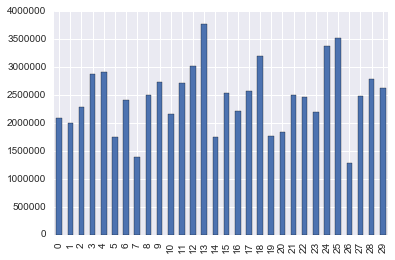

In [71]:
annual_attendance.attend.plot(kind='bar')

In [11]:
home_games.head()

,attendance,date,game_num,game_time,games_back,home_game,losses,night_game,opp,runs_against,runs_scored,streak,team,win,wins
1,49043.0,2015-04-06,1.0,198.0,1.0,1.0,1.0,1.0,8.0,5.0,4.0,-1.0,1.0,0.0,0.0
2,22626.0,2015-04-07,2.0,190.0,1.0,1.0,1.0,1.0,8.0,6.0,7.0,1.0,1.0,1.0,1.0
3,21642.0,2015-04-08,3.0,188.0,2.0,1.0,2.0,1.0,8.0,5.0,2.0,-1.0,1.0,0.0,1.0
4,27404.0,2015-04-10,4.0,181.0,2.0,1.0,2.0,1.0,27.0,3.0,4.0,1.0,1.0,1.0,2.0
5,37636.0,2015-04-11,5.0,156.0,1.0,1.0,2.0,1.0,27.0,0.0,6.0,2.0,1.0,1.0,3.0


In [12]:
home_games.columns

Index([u'attendance', u'date', u'game_num', u'game_time', u'games_back',
       u'home_game', u'losses', u'night_game', u'opp', u'runs_against',
       u'runs_scored', u'streak', u'team', u'win', u'wins'],
      dtype='object')

In [14]:
home_games.shape

(2414, 15)

In [15]:
home_games.dtypes

attendance             float64
date            datetime64[ns]
game_num               float64
game_time              float64
games_back             float64
home_game              float64
losses                 float64
night_game             float64
opp                    float64
runs_against           float64
runs_scored            float64
streak                 float64
team                   float64
win                    float64
wins                   float64
dtype: object

In [16]:
fci.head()

,team,avg_ticket,pct_change,avg_prem_ticket,beer,beer_oz,soft_drink,soft_drink_oz,hot_dog,parking,hat,fci,fci_pct_change
0,0,52.34,0.000,180.37,7.75,12,5.00,16,5.25,35.0,25.0,350.86,0.030
1,17,51.55,0.000,305.39,6.00,12,3.00,12,3.00,35.0,25.0,337.20,0.000
2,5,44.81,0.015,113.48,7.75,16,4.50,15,5.75,25.0,20.0,300.73,0.017
3,3,37.42,0.000,83.08,7.75,21,4.00,20,3.75,16.0,20.0,252.18,1.600
4,8,33.78,0.068,95.07,7.00,14,4.75,16,5.50,21.0,15.0,241.13,0.051


In [17]:
fci.shape

(30, 13)

In [18]:
fci.dtypes

team                 int64
avg_ticket         float64
pct_change         float64
avg_prem_ticket    float64
beer               float64
beer_oz              int64
soft_drink         float64
soft_drink_oz        int64
hot_dog            float64
parking            float64
hat                float64
fci                float64
fci_pct_change     float64
dtype: object

In [19]:
fci.columns

Index([u'team', u'avg_ticket', u'pct_change', u'avg_prem_ticket', u'beer',
       u'beer_oz', u'soft_drink', u'soft_drink_oz', u'hot_dog', u'parking',
       u'hat', u'fci', u'fci_pct_change'],
      dtype='object')

In [20]:
google.head()

,week,ARI,ATL,BAL,BOS,CHC,CIN,CLE,COL,CHW,...,PHI,PIT,SDP,SEA,SFG,STL,TBR,TEX,TOR,WSH
0,2015-01-04,18,18,9,17,4,11,8,11,15,...,12,8,16,11,0,11,17,5,3,12
1,2015-01-11,15,21,10,19,4,9,10,13,16,...,13,9,14,14,0,11,19,5,3,15
2,2015-01-18,18,19,9,20,6,12,11,13,17,...,14,9,12,19,0,12,17,7,3,31
3,2015-01-25,14,18,9,18,5,10,11,14,18,...,15,9,12,14,0,11,15,6,3,15
4,2015-02-01,16,17,9,18,4,11,10,14,14,...,15,9,18,18,43,12,17,7,3,17


In [21]:
google.dtypes

week    datetime64[ns]
ARI              int64
ATL              int64
BAL              int64
BOS              int64
CHC              int64
CIN              int64
CLE              int64
COL              int64
CHW              int64
DET              int64
HOU              int64
KCR              int64
LAA              int64
LAD              int64
MIA              int64
MIL              int64
MIN              int64
NYM              int64
NYY              int64
OAK              int64
PHI              int64
PIT              int64
SDP              int64
SEA              int64
SFG              int64
STL              int64
TBR              int64
TEX              int64
TOR              int64
WSH              int64
dtype: object

In [22]:
google.shape

(52, 31)

In [23]:
final_standings.head()

,team,wins,losses,win_loss,runs,runs_allowed,run_differential,home_success,road_success,vs_over_500,vs_under_500
0,20,100,62,0.617,4.0,3.2,0.8,29,9,15,23
1,21,98,64,0.605,4.3,3.7,0.6,25,9,10,24
2,5,97,65,0.599,4.3,3.8,0.5,17,15,12,20
3,15,95,67,0.586,4.5,4.0,0.5,21,7,4,24
4,16,93,69,0.574,5.5,4.1,1.4,25,-1,20,4


In [24]:
final_standings.columns

Index([u'team', u'wins', u'losses', u'win_loss', u'runs', u'runs_allowed',
       u'run_differential', u'home_success', u'road_success', u'vs_over_500',
       u'vs_under_500'],
      dtype='object')

In [25]:
df = pd.merge(home_games, fci, how='left', on=['team'])

In [26]:
df.head()

,attendance,date,game_num,game_time,games_back,home_game,losses,night_game,opp,runs_against,...,avg_prem_ticket,beer,beer_oz,soft_drink,soft_drink_oz,hot_dog,parking,hat,fci,fci_pct_change
0,49043.0,2015-04-06,1.0,198.0,1.0,1.0,1.0,1.0,8.0,5.0,...,52.14,4.0,14,1.5,24,2.75,10.0,9.99,126.89,0.0
1,22626.0,2015-04-07,2.0,190.0,1.0,1.0,1.0,1.0,8.0,6.0,...,52.14,4.0,14,1.5,24,2.75,10.0,9.99,126.89,0.0
2,21642.0,2015-04-08,3.0,188.0,2.0,1.0,2.0,1.0,8.0,5.0,...,52.14,4.0,14,1.5,24,2.75,10.0,9.99,126.89,0.0
3,27404.0,2015-04-10,4.0,181.0,2.0,1.0,2.0,1.0,27.0,3.0,...,52.14,4.0,14,1.5,24,2.75,10.0,9.99,126.89,0.0
4,37636.0,2015-04-11,5.0,156.0,1.0,1.0,2.0,1.0,27.0,0.0,...,52.14,4.0,14,1.5,24,2.75,10.0,9.99,126.89,0.0


In [27]:
df.tail()

,attendance,date,game_num,game_time,games_back,home_game,losses,night_game,opp,runs_against,...,avg_prem_ticket,beer,beer_oz,soft_drink,soft_drink_oz,hot_dog,parking,hat,fci,fci_pct_change
2409,28456.0,2015-09-24,152.0,185.0,7.5,1.0,74.0,0.0,2.0,5.0,...,111.95,6.5,16,5.0,24,5.25,10.0,12.0,232.08,0.018
2410,31019.0,2015-09-25,153.0,150.0,8.5,1.0,75.0,1.0,3.0,8.0,...,111.95,6.5,16,5.0,24,5.25,10.0,12.0,232.08,0.018
2411,32086.0,2015-09-26,154.0,230.0,8.5,1.0,75.0,0.0,3.0,1.0,...,111.95,6.5,16,5.0,24,5.25,10.0,12.0,232.08,0.018
2412,28661.0,2015-09-27,155.0,182.0,9.5,1.0,76.0,0.0,3.0,12.0,...,111.95,6.5,16,5.0,24,5.25,10.0,12.0,232.08,0.018
2413,24420.0,2015-09-28,156.0,157.0,9.0,1.0,76.0,0.0,24.0,1.0,...,111.95,6.5,16,5.0,24,5.25,10.0,12.0,232.08,0.018


In [29]:
df = pd.merge(df, annual_attendance, how='left', on=['team'])

In [30]:
df.head()

,attendance,date,game_num,game_time,games_back,home_game,losses,night_game,opp,runs_against,...,fci_pct_change,attend,attend_per_game,bat_age,pit_age,bpf,ppf,allstars,total_allstars,payroll_2015
0,49043.0,2015-04-06,1.0,198.0,1.0,1.0,1.0,1.0,8.0,5.0,...,0.0,2080145.0,25681.0,26.6,27.1,105.0,105.0,2,5,64434000.0
1,22626.0,2015-04-07,2.0,190.0,1.0,1.0,1.0,1.0,8.0,6.0,...,0.0,2080145.0,25681.0,26.6,27.1,105.0,105.0,2,5,64434000.0
2,21642.0,2015-04-08,3.0,188.0,2.0,1.0,2.0,1.0,8.0,5.0,...,0.0,2080145.0,25681.0,26.6,27.1,105.0,105.0,2,5,64434000.0
3,27404.0,2015-04-10,4.0,181.0,2.0,1.0,2.0,1.0,27.0,3.0,...,0.0,2080145.0,25681.0,26.6,27.1,105.0,105.0,2,5,64434000.0
4,37636.0,2015-04-11,5.0,156.0,1.0,1.0,2.0,1.0,27.0,0.0,...,0.0,2080145.0,25681.0,26.6,27.1,105.0,105.0,2,5,64434000.0


In [32]:
df = pd.merge(df, final_standings, how='left', on=['team'])

In [33]:
df.head()

,attendance,date,game_num,game_time,games_back,home_game,losses_x,night_game,opp,runs_against,...,wins_y,losses_y,win_loss,runs,runs_allowed,run_differential,home_success,road_success,vs_over_500,vs_under_500
0,49043.0,2015-04-06,1.0,198.0,1.0,1.0,1.0,1.0,8.0,5.0,...,79,83,0.488,4.4,4.4,0.0,-3,-1,-21,17
1,22626.0,2015-04-07,2.0,190.0,1.0,1.0,1.0,1.0,8.0,6.0,...,79,83,0.488,4.4,4.4,0.0,-3,-1,-21,17
2,21642.0,2015-04-08,3.0,188.0,2.0,1.0,2.0,1.0,8.0,5.0,...,79,83,0.488,4.4,4.4,0.0,-3,-1,-21,17
3,27404.0,2015-04-10,4.0,181.0,2.0,1.0,2.0,1.0,27.0,3.0,...,79,83,0.488,4.4,4.4,0.0,-3,-1,-21,17
4,37636.0,2015-04-11,5.0,156.0,1.0,1.0,2.0,1.0,27.0,0.0,...,79,83,0.488,4.4,4.4,0.0,-3,-1,-21,17


In [129]:
df.to_csv('df.csv', sep='\t', encoding='utf-8')

In [35]:
df.shape

(2414, 46)

In [36]:
df.isnull().any()

attendance          False
date                False
game_num            False
game_time           False
games_back          False
home_game           False
losses_x            False
night_game          False
opp                 False
runs_against        False
runs_scored         False
streak              False
team                False
win                 False
wins_x              False
avg_ticket          False
pct_change          False
avg_prem_ticket     False
beer                False
beer_oz             False
soft_drink          False
soft_drink_oz       False
hot_dog             False
parking             False
hat                 False
fci                 False
fci_pct_change      False
attend              False
attend_per_game     False
bat_age             False
pit_age             False
bpf                 False
ppf                 False
allstars            False
total_allstars      False
payroll_2015        False
wins_y              False
losses_y            False
win_loss    

In [43]:
lm = linear_model.LinearRegression()
X = df['fci'].values.reshape(-1, 1)
y = df['attendance'].values

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "FCI LR:", model.score(X, y)

(2414, 1)
(2414,)
FCI LR: 0.113841719098


In [53]:
lm = linear_model.LinearRegression()
X = df['beer'].values.reshape(-1, 1)
y = df['attendance'].values

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Beer LR:", model.score(X, y)

Beer LR: 0.0226686073295


In [50]:
lm = linear_model.LinearRegression()
X = df[['fci', 'payroll_2015']].values
y = df['attendance'].values

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "FCI, Salary LR:", model.score(X, y)

FCI, Salary LR: 0.392651149323


In [131]:
annual_attendance.corr()

,team,attend,attend_per_game,bat_age,pit_age,bpf,ppf,allstars,total_allstars,payroll_2015
team,1.000000,0.093891,0.088506,0.238228,-0.059294,-0.236183,-0.242460,0.245490,-0.101601,0.083442
attend,0.093891,1.000000,0.999514,0.418455,0.469990,0.045958,-0.049356,0.582240,0.612350,0.754981
attend_per_game,0.088506,0.999514,1.000000,0.414281,0.471701,0.051406,-0.044194,0.585575,0.612685,0.754013
bat_age,0.238228,0.418455,0.414281,1.000000,-0.074930,-0.014180,-0.023245,0.284270,0.450881,0.568021
pit_age,-0.059294,0.469990,0.471701,-0.074930,1.000000,0.055237,-0.012082,0.397943,0.341419,0.260849
bpf,-0.236183,0.045958,0.051406,-0.014180,0.055237,1.000000,0.990300,0.093741,0.033703,-0.041731
ppf,-0.242460,-0.049356,-0.044194,-0.023245,-0.012082,0.990300,1.000000,0.031151,-0.037676,-0.112465
allstars,0.245490,0.582240,0.585575,0.284270,0.397943,0.093741,0.031151,1.000000,0.460460,0.316485
total_allstars,-0.101601,0.612350,0.612685,0.450881,0.341419,0.033703,-0.037676,0.460460,1.000000,0.587559
payroll_2015,0.083442,0.754981,0.754013,0.568021,0.260849,-0.041731,-0.112465,0.316485,0.587559,1.000000


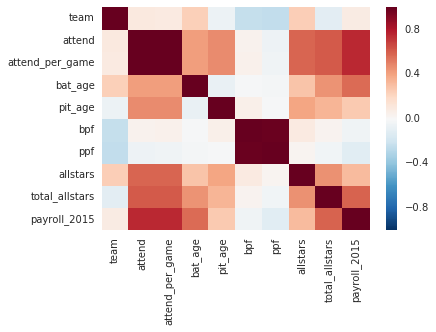

In [132]:
corr = annual_attendance.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [133]:
home_games.corr()

,attendance,game_num,game_time,games_back,home_game,losses,night_game,opp,runs_against,runs_scored,streak,team,win,wins
attendance,1.000000,0.014636,0.047472,-0.323629,NaN,-0.093478,-0.143840,-0.028608,-0.054596,0.026001,0.119659,0.066353,0.069894,0.122392
game_num,0.014636,1.000000,0.127000,0.448791,NaN,0.967604,0.056975,0.007975,0.047873,0.033946,-0.033767,-0.008091,-0.011167,0.967239
game_time,0.047472,0.127000,1.000000,0.095759,NaN,0.128842,-0.008931,0.011292,0.394318,0.199638,-0.150654,0.007574,-0.187426,0.116851
games_back,-0.323629,0.448791,0.095759,1.000000,NaN,0.629588,0.021480,-0.006229,0.142657,-0.016487,-0.245652,0.000884,-0.138883,0.237673
home_game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
losses,-0.093478,0.967604,0.128842,0.629588,NaN,1.000000,0.055692,-0.000629,0.083181,0.026747,-0.098878,-0.035995,-0.050299,0.871809
night_game,-0.143840,0.056975,-0.008931,0.021480,NaN,0.055692,1.000000,0.008807,-0.002433,-0.014660,-0.006555,0.025943,0.009634,0.054544
opp,-0.028608,0.007975,0.011292,-0.006229,NaN,-0.000629,0.008807,1.000000,0.007889,-0.018480,0.009833,0.017138,-0.013405,0.016107
runs_against,-0.054596,0.047873,0.394318,0.142657,NaN,0.083181,-0.002433,0.007889,1.000000,0.032536,-0.490455,-0.045431,-0.595477,0.009242
runs_scored,0.026001,0.033946,0.199638,-0.016487,NaN,0.026747,-0.014660,-0.018480,0.032536,1.000000,0.401459,-0.041329,0.503662,0.038966


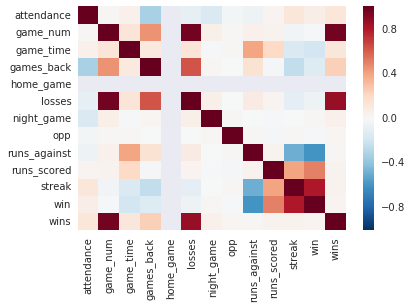

In [39]:
corr = home_games.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [45]:
fci.corr()

,team,avg_ticket,pct_change,avg_prem_ticket,beer,beer_oz,soft_drink,soft_drink_oz,hot_dog,parking,hat,fci,fci_pct_change
team,1.000000,-0.151920,0.409937,0.217962,-0.435975,-0.148044,-0.041612,-0.128029,-0.126147,-0.068838,-0.152692,-0.172891,0.016708
avg_ticket,-0.151920,1.000000,-0.054594,0.682629,0.533256,-0.003495,0.268319,-0.197927,0.228551,0.655090,0.415960,0.963099,0.186238
pct_change,0.409937,-0.054594,1.000000,0.207061,-0.057066,0.035438,0.287642,0.162986,0.240960,-0.198363,-0.290122,-0.066330,-0.118747
avg_prem_ticket,0.217962,0.682629,0.207061,1.000000,0.229409,-0.127948,0.273342,-0.021962,0.198206,0.488512,0.272956,0.680341,-0.049177
beer,-0.435975,0.533256,-0.057066,0.229409,1.000000,0.474346,0.357456,0.102362,0.261624,0.301460,0.339973,0.579351,-0.009733
beer_oz,-0.148044,-0.003495,0.035438,-0.127948,0.474346,1.000000,0.119480,0.250244,0.019360,-0.399754,0.106596,-0.020980,0.027119
soft_drink,-0.041612,0.268319,0.287642,0.273342,0.357456,0.119480,1.000000,0.559698,0.846535,0.083356,-0.006971,0.392928,0.176403
soft_drink_oz,-0.128029,-0.197927,0.162986,-0.021962,0.102362,0.250244,0.559698,1.000000,0.422995,-0.305338,-0.263702,-0.136337,0.135937
hot_dog,-0.126147,0.228551,0.240960,0.198206,0.261624,0.019360,0.846535,0.422995,1.000000,0.093405,-0.013241,0.359444,-0.053400
parking,-0.068838,0.655090,-0.198363,0.488512,0.301460,-0.399754,0.083356,-0.305338,0.093405,1.000000,0.524967,0.747283,0.092959


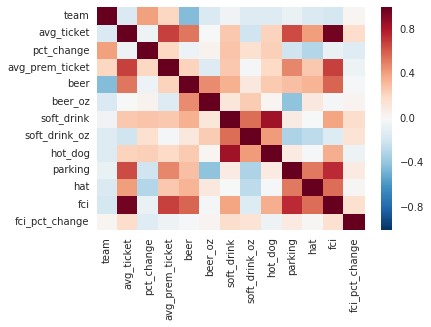

In [40]:
corr = fci.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [46]:
final_standings.corr()

,team,wins,losses,win_loss,runs,runs_allowed,run_differential,home_success,road_success,vs_over_500,vs_under_500
team,1.000000,0.078501,-0.084657,0.081564,-0.145484,-0.212516,0.080179,0.053354,0.088829,0.103521,0.034026
wins,0.078501,1.000000,-0.999707,0.999918,0.440218,-0.815411,0.879743,0.879409,0.822531,0.873503,0.849542
losses,-0.084657,-0.999707,1.000000,-0.999918,-0.441115,0.813273,-0.878644,-0.875991,-0.826566,-0.876206,-0.846584
win_loss,0.081564,0.999918,-0.999918,1.000000,0.440203,-0.814278,0.878846,0.877777,0.824579,0.874302,0.848784
runs,-0.145484,0.440218,-0.441115,0.440203,1.000000,-0.074471,0.664819,0.349244,0.407785,0.532395,0.213148
runs_allowed,-0.212516,-0.815411,0.813273,-0.814278,-0.074471,1.000000,-0.793815,-0.778980,-0.595844,-0.652243,-0.756676
run_differential,0.080179,0.879743,-0.878644,0.878846,0.664819,-0.793815,1.000000,0.792455,0.700633,0.813861,0.696948
home_success,0.053354,0.879409,-0.875991,0.877777,0.349244,-0.778980,0.792455,1.000000,0.452788,0.732456,0.783311
road_success,0.088829,0.822531,-0.826566,0.824579,0.407785,-0.595844,0.700633,0.452788,1.000000,0.763400,0.653492
vs_over_500,0.103521,0.873503,-0.876206,0.874302,0.532395,-0.652243,0.813861,0.732456,0.763400,1.000000,0.485475


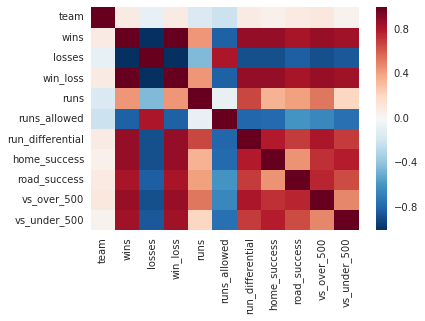

In [41]:
corr = final_standings.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [134]:
df.corr()

,attendance,game_num,game_time,games_back,home_game,losses_x,night_game,opp,runs_against,runs_scored,...,wins_y,losses_y,win_loss,runs,runs_allowed,run_differential,home_success,road_success,vs_over_500,vs_under_500
attendance,1.000000,0.014636,0.047472,-0.323629,NaN,-0.093478,-0.143840,-0.028608,-0.054596,0.026001,...,0.390718,-0.388311,0.389262,0.230732,-0.237271,0.318001,0.413438,0.237269,0.276523,0.401029
game_num,0.014636,1.000000,0.127000,0.448791,NaN,0.967604,0.056975,0.007975,0.047873,0.033946,...,-0.008736,0.008831,-0.008832,0.000522,0.013582,-0.010014,-0.009807,-0.004779,-0.000399,-0.015433
game_time,0.047472,0.127000,1.000000,0.095759,NaN,0.128842,-0.008931,0.011292,0.394318,0.199638,...,-0.032216,0.031182,-0.031598,0.000267,0.073192,-0.055028,-0.069169,0.022673,-0.045629,-0.007319
games_back,-0.323629,0.448791,0.095759,1.000000,NaN,0.629588,0.021480,-0.006229,0.142657,-0.016487,...,-0.610330,0.609135,-0.609795,-0.304346,0.495093,-0.558179,-0.611157,-0.413986,-0.483545,-0.572264
home_game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
losses_x,-0.093478,0.967604,0.128842,0.629588,NaN,1.000000,0.055692,-0.000629,0.083181,0.026747,...,-0.205502,0.205671,-0.205638,-0.071029,0.179437,-0.177902,-0.189391,-0.159293,-0.164624,-0.191217
night_game,-0.143840,0.056975,-0.008931,0.021480,NaN,0.055692,1.000000,0.008807,-0.002433,-0.014660,...,0.002084,-0.001306,0.001864,-0.054414,-0.012310,-0.023582,0.024219,-0.025464,-0.029508,0.035369
opp,-0.028608,0.007975,0.011292,-0.006229,NaN,-0.000629,0.008807,1.000000,0.007889,-0.018480,...,0.037240,-0.038700,0.037943,0.028382,0.007436,0.012193,-0.013796,0.087062,0.067806,-0.005633
runs_against,-0.054596,0.047873,0.394318,0.142657,NaN,0.083181,-0.002433,0.007889,1.000000,0.032536,...,-0.137488,0.136888,-0.137169,-0.005056,0.171281,-0.131859,-0.149164,-0.079372,-0.116931,-0.119853
runs_scored,0.026001,0.033946,0.199638,-0.016487,NaN,0.026747,-0.014660,-0.018480,0.032536,1.000000,...,0.019680,-0.019798,0.019575,0.145888,0.041080,0.057626,0.018035,0.015469,0.033442,-0.000950


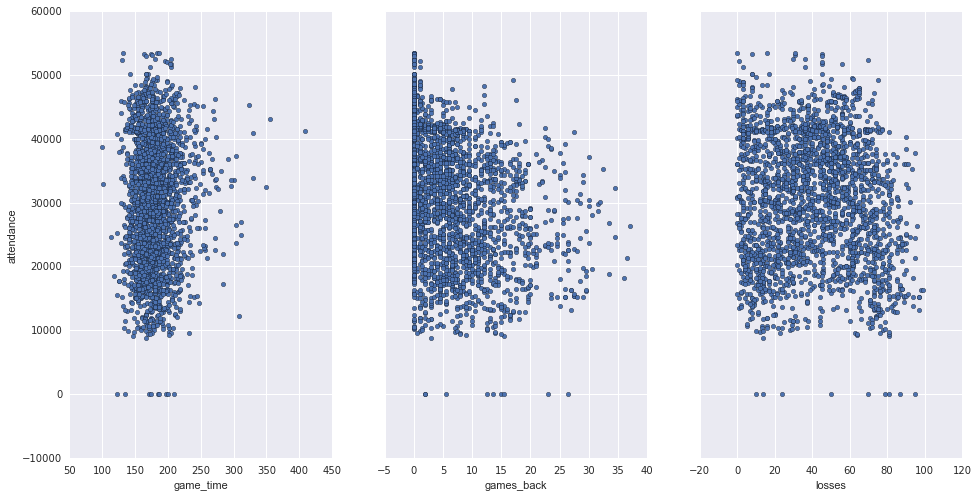

In [55]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
home_games.plot(kind='scatter', x='game_time', y='attendance', ax=axs[0], figsize=(16, 8))
home_games.plot(kind='scatter', x='games_back', y='attendance', ax=axs[1])
home_games.plot(kind='scatter', x='losses', y='attendance', ax=axs[2])

#  	runs_scored 	streak 	win 	wins

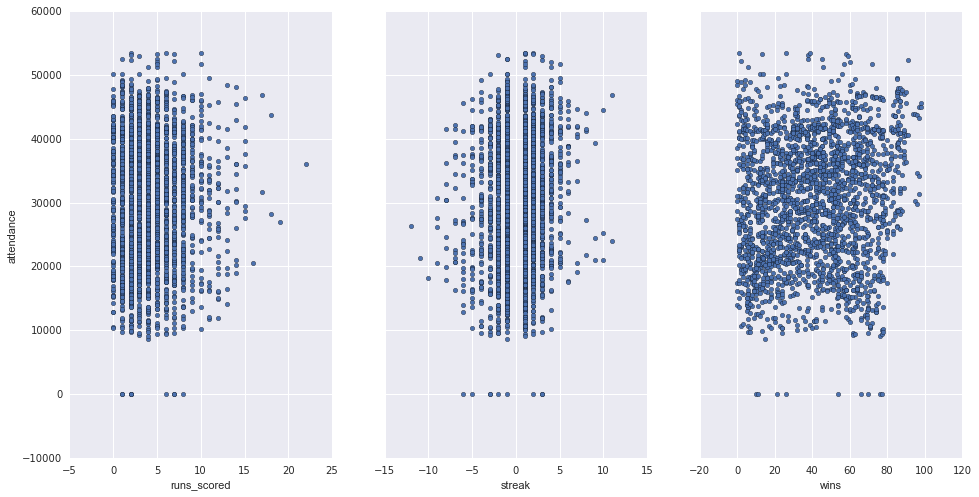

In [57]:
fig, axs = plt.subplots(1, 3, sharey=True)
home_games.plot(kind='scatter', x='runs_scored', y='attendance', ax=axs[0], figsize=(16, 8))
home_games.plot(kind='scatter', x='streak', y='attendance', ax=axs[1])
home_games.plot(kind='scatter', x='wins', y='attendance', ax=axs[2])

In [67]:
lm = linear_model.LinearRegression()
X = home_games[['game_time', 'games_back', 'home_game', 'losses', 'night_game', 
                'opp', 'runs_against', 'runs_scored', 'streak', 'win', 'wins']]
y = home_games['attendance']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "First LR:", model.score(X, y)

First LR: 0.207774743034


In [138]:
df.shape

(2414, 46)

In [137]:
df.columns

Index([u'attendance', u'date', u'game_num', u'game_time', u'games_back',
       u'home_game', u'losses_x', u'night_game', u'opp', u'runs_against',
       u'runs_scored', u'streak', u'team', u'win', u'wins_x', u'avg_ticket',
       u'pct_change', u'avg_prem_ticket', u'beer', u'beer_oz', u'soft_drink',
       u'soft_drink_oz', u'hot_dog', u'parking', u'hat', u'fci',
       u'fci_pct_change', u'attend', u'attend_per_game', u'bat_age',
       u'pit_age', u'bpf', u'ppf', u'allstars', u'total_allstars',
       u'payroll_2015', u'wins_y', u'losses_y', u'win_loss', u'runs',
       u'runs_allowed', u'run_differential', u'home_success', u'road_success',
       u'vs_over_500', u'vs_under_500'],
      dtype='object')

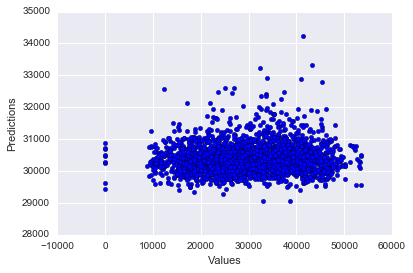

Score for  game_time is:  0.00225362987621



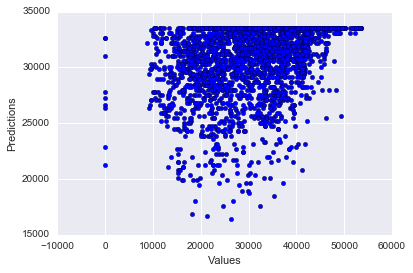

Score for  games_back is:  0.10473571418



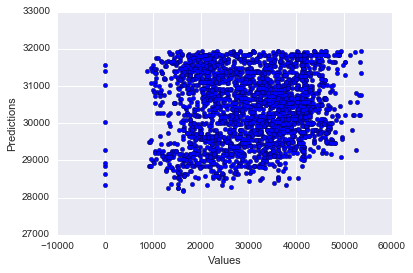

Score for  losses_x is:  0.00873807174864



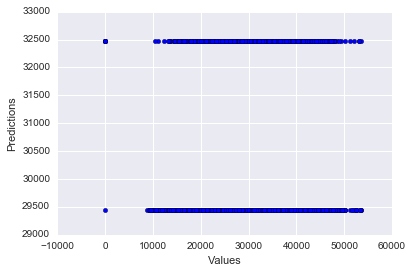

Score for  night_game is:  0.0206900520676



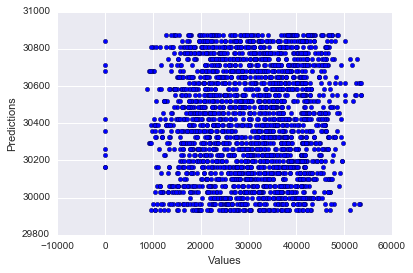

Score for  opp is:  0.00081842162916



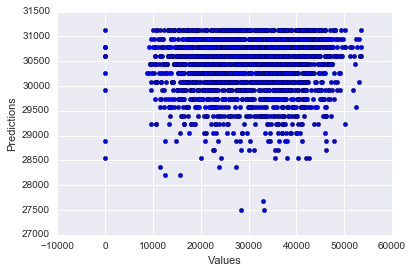

Score for  runs_against is:  0.00298075140687



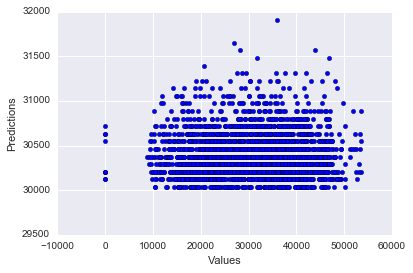

Score for  runs_scored is:  0.000676065600615



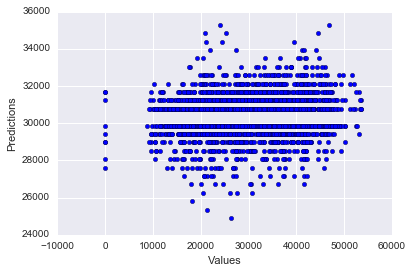

Score for  streak is:  0.0143183126723



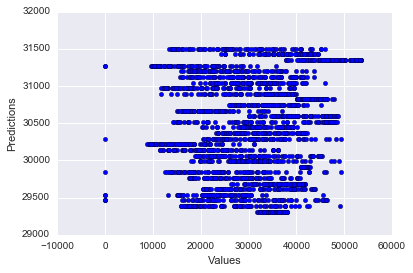

Score for  team is:  0.00440272594583



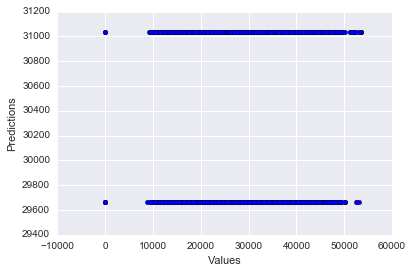

Score for  win is:  0.00488518039717



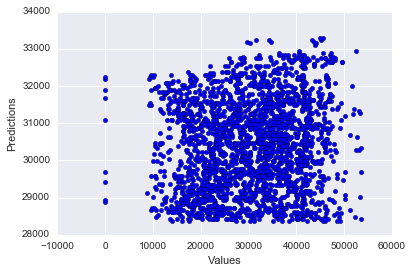

Score for  wins_x is:  0.014979822542



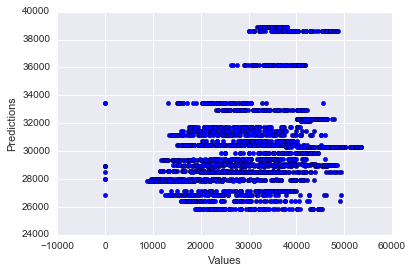

Score for  avg_ticket is:  0.102410794775



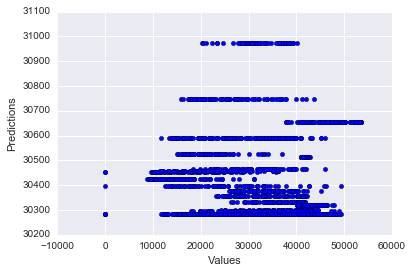

Score for  pct_change is:  0.000285559263349



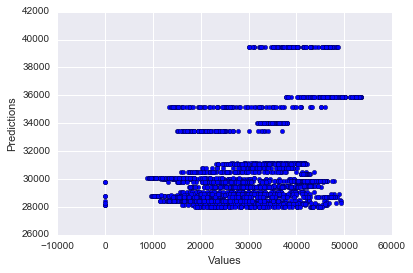

Score for  avg_prem_ticket is:  0.0710530719996



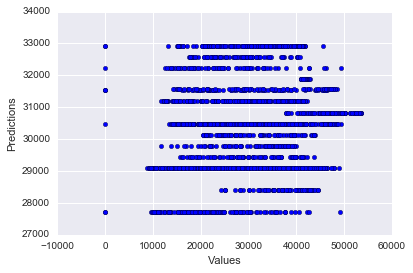

Score for  beer is:  0.0226686073295



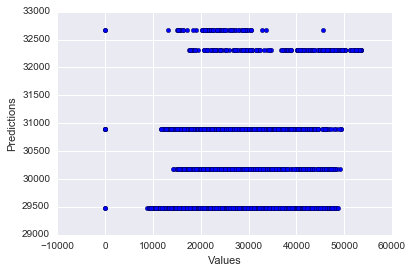

Score for  beer_oz is:  0.00855335470442



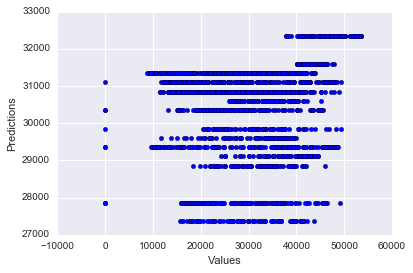

Score for  soft_drink is:  0.0147198957486



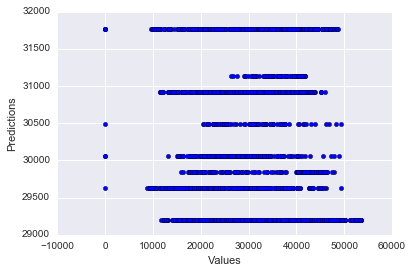

Score for  soft_drink_oz is:  0.00879342212343



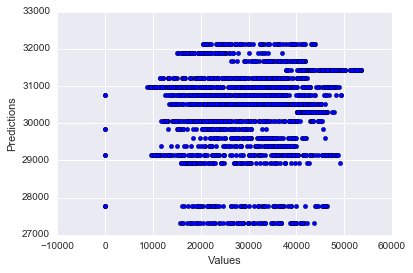

Score for  hot_dog is:  0.012501043882



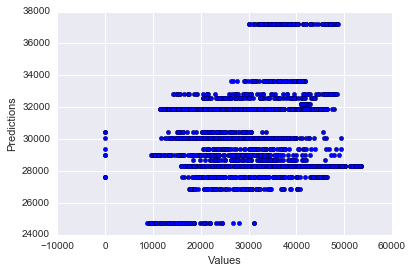

Score for  parking is:  0.0765259506277



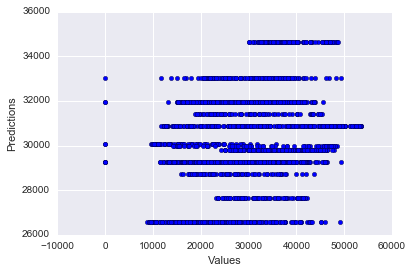

Score for  hat is:  0.0447300835809



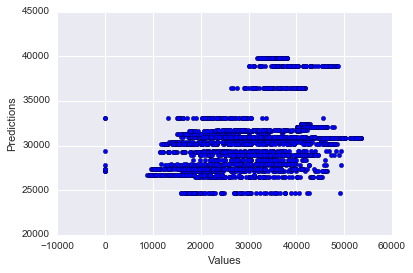

Score for  fci is:  0.113841719098



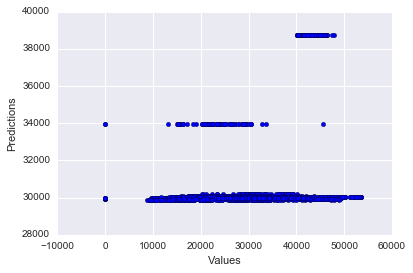

Score for  fci_pct_change is:  0.0302256003757



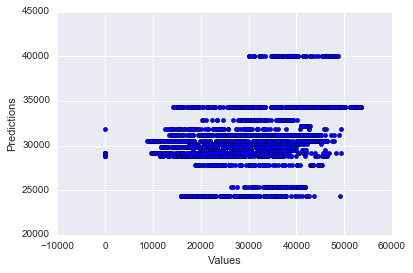

Score for  bat_age is:  0.0938877824141



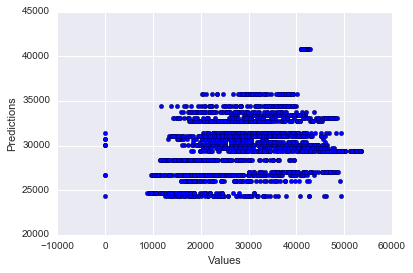

Score for  pit_age is:  0.120538495427



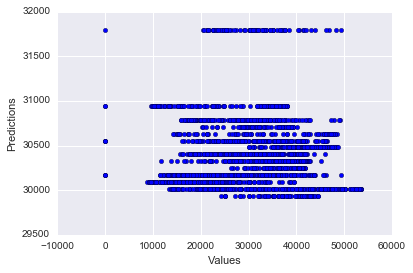

Score for  bpf is:  0.00147940974086



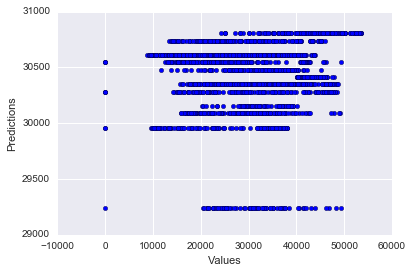

Score for  ppf is:  0.00102624470698



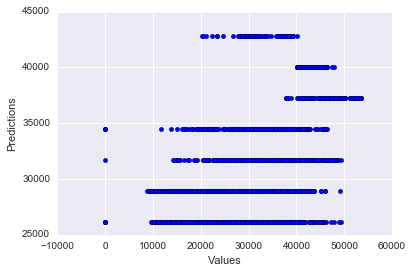

Score for  allstars is:  0.184110859904



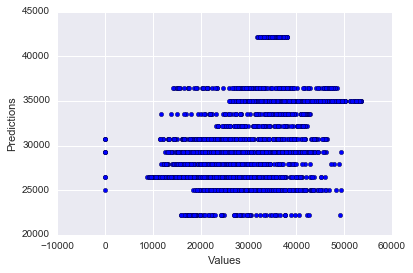

Score for  total_allstars is:  0.205856061915



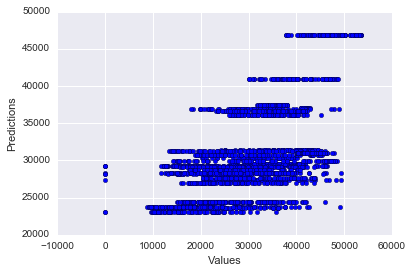

Score for  payroll_2015 is:  0.31099862492



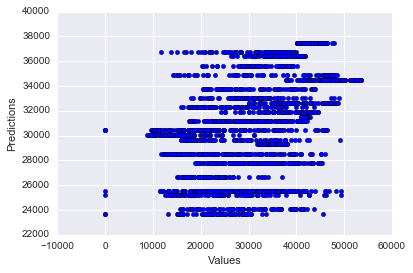

Score for  wins_y is:  0.152660369663



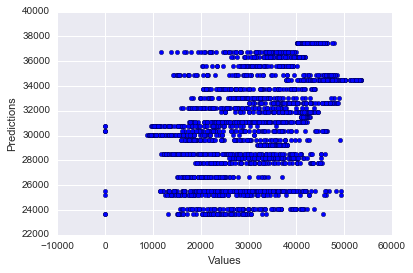

Score for  losses_y is:  0.150785480871



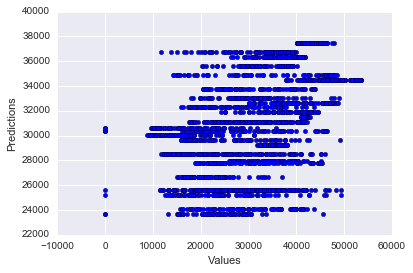

Score for  win_loss is:  0.151524760971



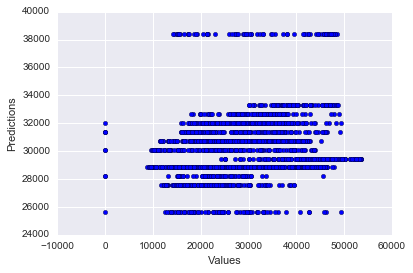

Score for  runs is:  0.0532374583591



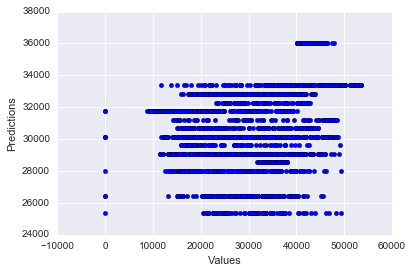

Score for  runs_allowed is:  0.0562973845721



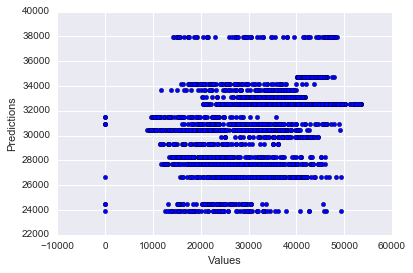

Score for  run_differential is:  0.10112432474



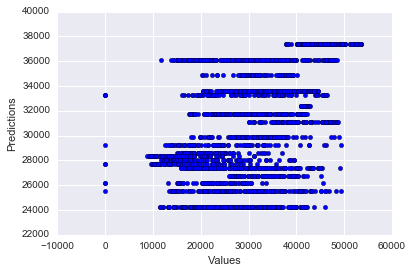

Score for  home_success is:  0.170931062113



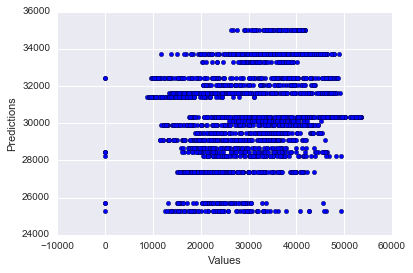

Score for  road_success is:  0.0562965494177



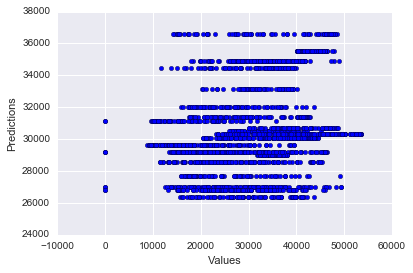

Score for  vs_over_500 is:  0.0764649703756



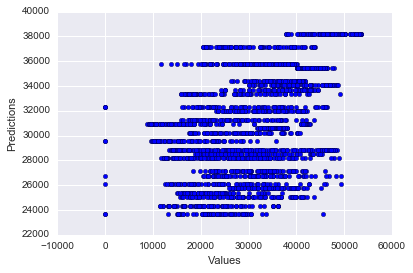

Score for  vs_under_500 is:  0.160824178026



In [122]:
#Testing one variable at a time

Xs = ['game_time', 'games_back', 'losses_x', 'night_game', 'opp', 'runs_against', 'runs_scored', 'streak', 
      'team', 'win', 'wins_x', 'avg_ticket', 'pct_change', 'avg_prem_ticket', 'beer', 'beer_oz', 'soft_drink', 
      'soft_drink_oz', 'hot_dog', 'parking', 'hat', 'fci','fci_pct_change', 'bat_age', 'pit_age', 'bpf', 'ppf', 
      'allstars', 'total_allstars', 'payroll_2015', 'wins_y', 'losses_y', 'win_loss', 'runs', 'runs_allowed', 
      'run_differential', 'home_success', 'road_success', 'vs_over_500', 'vs_under_500']

for i in range(len(Xs)):
    y = df['attendance'].values
    X = df[Xs[i]].values.reshape(-1, 1)

    lm = linear_model.LinearRegression()
    model = lm.fit(X, y)
    predictions = model.predict(X)

    plt.scatter(y, predictions)
    plt.xlabel("Values")
    plt.ylabel("Predictions")
    plt.show()
    print 'Score for ', Xs[i], 'is: ', model.score(X, y)
    print ''

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
import numpy as np

Xs = ['game_time', 'games_back', 'losses_x', 'night_game', 'opp', 'runs_against', 'runs_scored', 'streak', 
      'team', 'win', 'wins_x', 'avg_ticket', 'pct_change', 'avg_prem_ticket', 'beer', 'beer_oz', 'soft_drink', 
      'soft_drink_oz', 'hot_dog', 'parking', u'hat', u'fci','fci_pct_change', 'bat_age', 'pit_age', 'bpf', 'ppf', 
      'allstars', 'total_allstars', 'payroll_2015', 'wins_y', 'losses_y', 'win_loss', 'runs', 'runs_allowed', 
      'run_differential', 'home_success', 'road_success', 'vs_over_500', 'vs_under_500']

y = df['attendance']

set_of_scores = []

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(df[Xs], df['attendance'], test_size=.25, random_state=0)
model.fit(X_train, y_train)
model_score = model.predict(X_test)

print 'The score is: %s' % (model_score)
set_of_scores.append(model_score)
print 'The average score is: %s' % np.mean(set_of_scores)

The score is: [ 34030.01170865  30133.30714675  22283.95263393  41694.77262733
  34560.64432744  34740.44677473  31844.02054264  41370.18529374
  34551.17235281  21491.65458483  16929.08916121  33656.48316885
  24390.6419224   37183.75952374  23865.81437604  31663.36823968
  19824.09017649  20531.31951331  31389.39693446  31489.15653011
  32244.75866516  18111.92032164  37707.87923179  36092.20252828
  25504.02349017  23158.01693738  33425.68774335  33190.02500861
  45891.07943117  32030.70021425  22664.06933225  27796.20008207
  23337.35876848  33457.9165562   30404.73626177  28254.85068492
  29851.09041833  34982.93371035  44722.16867438  32831.68722115
  25113.52109221  32203.21677198  17666.45838299  23082.36626269
  15103.92696556  35943.29573888  31203.18277615  23269.80451158
  19867.35011509  32401.4352867   31530.87313063  15436.17765211
  42315.5874405   34368.89675008  33435.84184828  34468.38773887
  23143.45462253  34772.73717029  22676.8177336   40981.90928739
  33656.447

In [126]:
model.score(X_test, y_test)

0.53984310789719459

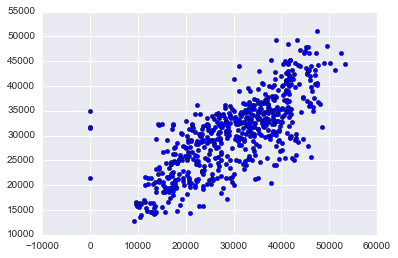

In [104]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.scatter(y_test, model_score)

In [116]:
from sklearn.grid_search import GridSearchCV

Xs = df[['game_time', 'games_back', 'losses_x', 'night_game', 'opp', 'runs_against', 'runs_scored', 
           'streak', 'team', 'win', 'wins_x', 'avg_ticket', 'pct_change', 'avg_prem_ticket', 'beer', 
           'beer_oz', 'soft_drink', 'soft_drink_oz', 'hot_dog', 'parking', 'hat', 'fci','fci_pct_change',
           'attend', 'attend_per_game', 'bat_age', 'pit_age', 'bpf', 'ppf', 'allstars', 'total_allstars',
           'payroll_2015', 'wins_y', 'losses_y', 'win_loss', 'runs', 'runs_allowed', 'run_differential',
           'home_success', 'road_success', 'vs_over_500', 'vs_under_500']]

y = df['attendance']

rfs = RandomForestRegressor()
param_grid = {'n_estimators':[10, 100, 250, 500, 750, 1000], 'max_features':[3, 5, 7, 9, 11],
           'max_depth': [3, 5, 7, 9, 11]}

CV_rfs = GridSearchCV(estimator=rfs, param_grid=param_grid, cv=5)
CV_rfs.fit(Xs, y)
print CV_rfs.best_params_
print CV_rfs.best_score_

{'max_features': 11, 'n_estimators': 500, 'max_depth': 9}


In [117]:
print CV_rfs.best_score_

0.481526113858


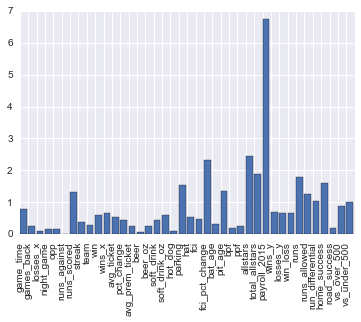

In [124]:
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ['game_time', 'games_back', 'losses_x', 'night_game', 'opp', 'runs_against', 'runs_scored', 
           'streak', 'team', 'win', 'wins_x', 'avg_ticket', 'pct_change', 'avg_prem_ticket', 'beer', 
           'beer_oz', 'soft_drink', 'soft_drink_oz', 'hot_dog', 'parking', 'hat', 'fci','fci_pct_change',
            'bat_age', 'pit_age', 'bpf', 'ppf', 'allstars', 'total_allstars','payroll_2015', 'wins_y', 
              'losses_y', 'win_loss', 'runs', 'runs_allowed', 'run_differential','home_success', 
              'road_success', 'vs_over_500', 'vs_under_500']

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(df[predictors], df['attendance'])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()